# Udacity Data Analyst Nanodegree Project - Wrangle and Analyze Data

##  Twitter Data from  WeRateDogs (@dog_rates)

## Introduction:

**From the project's introductory page**

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

Let us begin this data wrangling project by importing all of our necessary libraries:

In [1]:
# Importing libraries
import json
import numpy as np
import pandas as pd
import requests
import tweepy
import os
import re
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

sns.set_style ('whitegrid')
%matplotlib inline

# Display maximum columns with maximum column width for visual assessment
pd.set_option('display.max_columns', None)


## Section 1 : Gather Data

### 1. Twitter Archive

In [2]:
# Loading 'enhanced' Twitter archive from a local file and verifying
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
df_twitter.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


### 2. Image Predictions 

In [4]:
# Loading predictions of dog breeds from provided URL
image_url = ('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/'
            '599fd2ad_image-predictions/image-predictions.tsv')
r = requests.get(image_url)
    
# Saving Data to a local file
with open (image_url.split('/')[-1], mode = 'wb') as file: 
    file.write(r.content)

# Loading TSV file into a dataframe and verifying
df_image = pd.read_csv('image-predictions.tsv', delimiter = '\t')
df_image.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
df_image.tail(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


### 3. Tweets - *From Twitter's API*

***Note: My application for a Twitter developer account was not approved; hence, the following code was copied and pasted from the 'twitter_api.py' file provided in the project resource section.***

In [6]:
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [7]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter.tweet_id.values
len(tweet_ids)


2356

In [17]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

KeyboardInterrupt: 

In [8]:
# Reading the file, line by line into a dataframe
tweets_info = []

with open ('tweet-json.txt') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets_info.append(tweet)
        except:
            continue

df_tweets = pd.DataFrame(tweets_info, columns = list(tweets_info[0].keys()))

# Verifying
df_tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8853,39467,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,6514,33819,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,4328,25461,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8964,42908,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,9774,41048,False,False,False,False,en


In [9]:
# Listing all columns in df_tweet_info
df_tweets.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang'],
      dtype='object')

## Section 2 : Assess Data

### 1. Visual Assessment

In [10]:
df_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
df_tweets

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8853,39467,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,6514,33819,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,4328,25461,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8964,42908,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,9774,41048,False,False,False,False,en
5,Sat Jul 29 00:08:17 +0000 2017,891087950875897856,891087950875897856,Here we have a majestic great white breaching ...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,3261,20562,False,False,False,False,en
6,Fri Jul 28 16:27:12 +0000 2017,890971913173991426,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,2158,12041,False,False,False,False,en
7,Fri Jul 28 00:22:40 +0000 2017,890729181411237888,890729181411237888,When you watch your owner call another dog a g...,False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,16716,56848,False,False,False,False,en
8,Thu Jul 27 16:25:51 +0000 2017,890609185150312448,890609185150312448,This is Zoey. She doesn't want to be one of th...,False,"[0, 122]","{'hashtags':

### 2. Programmatic Assessment

#### DataFrame: `df_twitter`

In [13]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
# Looking for duplications in df_twitter ids
sum(df_twitter['tweet_id'].duplicated())

0

In [15]:
# Assessing null values in df_twitter's 'expanded_urls' column
df_twitter[df_twitter['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [16]:
print("Number of null values in 'expanded_urls' column: ", sum(df_twitter['expanded_urls'].isnull()))

Number of null values in 'expanded_urls' column:  59


In [17]:
# Getting names counts for df_twitter
df_twitter.name.value_counts()

None              745
a                  55
Charlie            12
Oliver             11
Lucy               11
Cooper             11
Lola               10
Penny              10
Tucker             10
Winston             9
Bo                  9
the                 8
Sadie               8
Bailey              7
Buddy               7
Daisy               7
Toby                7
an                  7
Koda                6
Jax                 6
Milo                6
Oscar               6
Bella               6
Rusty               6
Dave                6
Scout               6
Stanley             6
Jack                6
Leo                 6
Phil                5
                 ... 
Rontu               1
Iroh                1
Sprinkles           1
Mingus              1
Skittles            1
Ralphy              1
Maude               1
Remy                1
Darrel              1
Kallie              1
Pupcasso            1
Storkson            1
Tedrick             1
Jeremy              1
Spencer   

In [18]:
# Getting numerator value counts for df_twitter
df_twitter.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [19]:
# Identifying rows which have decimal values in tweet text and different values
# in the ratings_numerator column
df_twitter[df_twitter.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


In [20]:
# Assessing outlier values
with pd.option_context('max_colwidth', 250):
    display(df_twitter.query('rating_numerator == [420, 165, 144, 182, 143, 666, 960, 1776, 121, 204]'))

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/684225744407494656/photo/1,https://twitter.com/dog_rates/status/684225744407494656/photo/1",143,130,None,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868335505415/photo/1,121,110,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515794329600/photo/1,144,120,None,None,None,None,None


In [21]:
# Getting denominator value counts
df_twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [22]:
df_twitter.query('rating_denominator == [11, 50, 80, 20, 2, 16, 40, 70, 15, 90, 110, 120, 130, 150, 170, 7, 0]')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [23]:
# Getting rows with 0 in rating_denominator
df_twitter.query('rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [24]:
# Gettings rows with 0 in rating_numerator
df_twitter.query('rating_numerator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [25]:
# Identiyfing all uppercase dog names
sum(df_twitter['name'].str.isupper())

2

In [26]:
# Identifying all lowercase dog names
sum(df_twitter['name'].str.islower())

109

In [27]:
# Displaying uppercase dog name instances
df_twitter[df_twitter['name'].str.isupper()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None
2041,671542985629241344,NaN,NaN,2015-12-01 04:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is JD (stands for ""just dog""). He's like ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671542985...,10,10,JD,None,None,None,None


In [28]:
# Displaying lowercase dog name instances
df_twitter[df_twitter['name'].str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [29]:
# Assessing dog classification / dog stages
print('Doggo Counts:\n', df_twitter['doggo'].value_counts(), '\n')
print('Floofer Counts:\n ', df_twitter['floofer'].value_counts(), '\n')
print('Pupper Counts:\n ', df_twitter['pupper'].value_counts(), '\n')
print('Puppo Counts:\n ', df_twitter['puppo'].value_counts())

Doggo Counts:
 None     2259
doggo      97
Name: doggo, dtype: int64 

Floofer Counts:
  None       2346
floofer      10
Name: floofer, dtype: int64 

Pupper Counts:
  None      2099
pupper     257
Name: pupper, dtype: int64 

Puppo Counts:
  None     2326
puppo      30
Name: puppo, dtype: int64


In [30]:
# Generating a random sample from df_twitter
df_twitter.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1227,713909862279876608,NaN,NaN,2016-03-27 02:05:49 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Doug. His nose is legendary af. 12/10 ...,NaN,NaN,NaN,https://vine.co/v/iDWlapaXWmm,12,10,Doug,None,None,None,None
131,867051520902168576,NaN,NaN,2017-05-23 16:16:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Oh my this spooked me up. We only rate dogs, n...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/867051520...,13,10,None,None,None,None,None
1398,699775878809702401,NaN,NaN,2016-02-17 02:02:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fillup. Spaghetti is his main weakness. A...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699775878...,11,10,Fillup,None,None,None,None
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
866,762035686371364864,NaN,NaN,2016-08-06 21:20:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This left me speechless. 14/10 heckin heroic a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/762035686...,14,10,None,None,None,None,None
1384,700796979434098688,NaN,NaN,2016-02-19 21:39:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daniel. He's a neat pup. Exotic af. Cu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700796979...,7,10,Daniel,None,None,None,None
1551,689143371370250240,NaN,NaN,2016-01-18 17:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Trip. He likes wearing costumes that aren...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689143371...,10,10,Trip,None,None,pupper,None
616,796484825502875648,NaN,NaN,2016-11-09 22:49:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sleepy doggo that requested some assi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796484825...,12,10,None,doggo,None,None,None
1505,691793053716221953,NaN,NaN,2016-01-26 01:21:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",We usually don't rate penguins but this one is...,NaN,NaN,NaN,https://vine.co/v/OTTVAKw6YlW,10,10,None,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None


In [31]:
# Statistical summary of df_twitter
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### DataFrame: `df_image`

In [32]:
# Assessing df_image
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
# Looking for duplications in df_image ids
sum(df_image['tweet_id'].duplicated())

0

In [34]:
# Looking for duplicated images in jpg_url
sum(df_image['jpg_url'].duplicated())

66

In [35]:
# Distribution of dog breeds
df_image.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
web_site                      19
Cardigan                      19
Eskimo_dog                    18
teddy                         18
Shetland_sheepdog             18
Maltese_dog                   18
beagle                        18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [36]:
# Assessing number of true and false classifications of dogs
print('p1_dog Counts:\n', df_image.p1_dog.value_counts(), '\n')
print('p2_dog Counts:\n', df_image.p2_dog.value_counts(), '\n')
print('p3_dog Counts:\n', df_image.p3_dog.value_counts())

p1_dog Counts:
 True     1532
False     543
Name: p1_dog, dtype: int64 

p2_dog Counts:
 True     1553
False     522
Name: p2_dog, dtype: int64 

p3_dog Counts:
 True     1499
False     576
Name: p3_dog, dtype: int64


In [37]:
# Generating random sample of df_image
df_image.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
384,673343217010679808,https://pbs.twimg.com/media/CVgyFSyU4AA9p1e.jpg,1,Chihuahua,0.541408,True,Italian_greyhound,0.156891,True,miniature_pinscher,6.955580e-02,True
1190,739844404073074688,https://pbs.twimg.com/media/CkR0jrhWYAALL5N.jpg,1,toy_poodle,0.342397,True,table_lamp,0.104451,False,miniature_poodle,7.987100e-02,True
123,668226093875376128,https://pbs.twimg.com/media/CUYEFlQXAAUkPGm.jpg,1,trombone,0.390339,False,cornet,0.314149,False,French_horn,2.551820e-01,False
669,683078886620553216,https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg,1,koala,0.141432,False,Eskimo_dog,0.094044,True,wallaby,8.523650e-02,False
1760,825876512159186944,https://pbs.twimg.com/media/C3YaSnQWAAILgz0.jpg,1,shopping_cart,0.995941,False,shopping_basket,0.004057,False,mousetrap,8.832830e-07,False
1545,792050063153438720,https://pbs.twimg.com/media/Cv3tU38WcAASFas.jpg,2,komondor,0.942856,True,swab,0.052715,False,Tibetan_terrier,2.743000e-03,True
810,692187005137076224,https://pbs.twimg.com/media/CZskaEIWIAUeTr5.jpg,2,Siberian_husky,0.810592,True,malamute,0.119745,True,Eskimo_dog,2.926480e-02,True
948,704819833553219584,https://pbs.twimg.com/media/CcgF5ovW8AACrEU.jpg,1,guinea_pig,0.994776,False,hamster,0.004069,False,wood_rabbit,2.058690e-04,False
423,674053186244734976,https://pbs.twimg.com/media/CVq3zAaWwAA8vpk.jpg,1,Cardigan,0.984725,True,Pembroke,0.008730,True,kelpie,2.194770e-03,True
1083,718460005985447936,https://pbs.twimg.com/media/Cfh7j6CWQAAndTd.jpg,1,badger,0.356946,False,Boston_bull,0.252781,True,kelpie,1.134330e-01,True


In [38]:
# Statistical summary of df_image
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### DataFrame: `df_tweets`

In [39]:
# Assessing df_tweets
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 27 columns):
created_at                       2354 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null object
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null object
coordinates                      0 non-null

In [40]:
# Looking for duplications in df_tweets ids
sum(df_tweets['id'].duplicated())

0

In [41]:
# Generating a random sample of df_tweets
df_tweets.sample(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
105,Tue Jun 06 00:01:46 +0000 2017,871879754684805121,871879754684805121,Say hello to Lassie. She's celebrating #PrideM...,False,"[0, 136]","{'hashtags': [{'text': 'PrideMonth', 'indices'...","{'media': [{'id': 871879745683804161, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,11918,39090,False,False,False,False,en
1294,Thu Mar 10 16:42:10 +0000 2016,707969809498152960,707969809498152960,Meet Rufus. He's a Honeysuckle Firefox. Curly ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 707969786605670405, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,1097,2941,False,False,False,False,en
101,Thu Jun 08 01:06:27 +0000 2017,872620804844003328,872620804844003328,This is Monkey. She's supporting owners everyw...,False,"[0, 116]","{'hashtags': [{'text': 'PrideMonth', 'indices'...","{'media': [{'id': 872620798208610305, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,3911,21309,False,False,False,False,en
1127,Mon May 09 00:11:16 +0000 2016,729463711119904772,729463711119904772,Meet Pupcasso. You can't afford his art. 13/10...,False,"[0, 58]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 729463699031916544, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,2586,6340,False,False,False,False,en
165,Thu May 04 00:15:58 +0000 2017,859924526012018688,859924526012018688,Meet Milky. She has no idea what happened. Jus...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 859924516142804992, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,4349,20021,False,False,False,False,en
630,Thu Nov 03 15:51:10 +0000 2016,794205286408003585,794205286408003585,This is Laika. She was a space pupper. The fir...,False,"[0, 119]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 794205269047836673, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,3895,10314,False,False,False,False,en
2136,Fri Nov 27 00:43:49 +0000 2015,670040295598354432,670040295598354432,😂😂😂 10/10 for the dog and the owner https://t....,False,"[0, 59]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 670040288568610816, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,118,801,False,False,False,False,en
1592,Mon Jan 11 02:40:19 +0000 2016,686377065986265092,686377065986265092,Meet Birf. He thinks he's gone blind. 10/10 ve...,False,"[0, 90]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 686377054594441218, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,637,2433,False,False,False,False,en
1238,Tue Mar 22 01:16:55 +0000 2016,712085617388212225,712085617388212225,Say hello to Olive and Ruby. They are best bud...,False,"[0, 104]

In [42]:
df_tweets['retweeted'].value_counts()

False    2354
Name: retweeted, dtype: int64

In [43]:
# Statistical summary of df_tweets
df_tweets.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count
count,2.354000e+03,7.800000e+01,7.800000e+01,2354.000000,2354.000000
mean,7.426978e+17,7.455079e+17,2.014171e+16,3164.797366,8080.968564
std,6.852812e+16,7.582492e+16,1.252797e+17,5284.770364,11814.771334
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000
25%,6.783975e+17,6.757419e+17,3.086374e+08,624.500000,1415.000000
50%,7.194596e+17,7.038708e+17,4.196984e+09,1473.500000,3603.500000
75%,7.993058e+17,8.257804e+17,4.196984e+09,3652.000000,10122.250000
max,8.924206e+17,8.862664e+17,8.405479e+17,79515.000000,132810.000000


### 3. Observations and Course of Action

Though the datasets contain numerous quality and tidyness issues, we will be focusing on the following for the duration of the project.

### Quality Issues

Addressing data quality issues for:

**`df_twitter` table**
1. Remove any rows which contain retweets.
2. Some names in the `name` column are incorrect (for eg. 'a', 'an', etc.) and replace "O" with "O'Malley".
3. `timestamp` has an incorrect datatype.
4. The column `timestamp` needs to be separated into columns for day, month and year.
5. Remove columns which are of no use to this analysis. 
6. Fix ratings numerators and denominators datatype.
7. Fix ratings numerators which have decimals.
8. Drop denominators greater than 10 (many indicate multiple dogs).
9. Standardize ratings into one column (ratings for individual dogs).


**`df_image` table**

1. Underscores in columns `p1`, `p2`, `p3` need to be removed.
2. Columns `p1`, `p2`, `p3` have inconsistent capitalization.
3. Consolidate `p1`, `p2`, `p3` into one `breed` prediction column and `p1_conf`, `p2_conf`, `p3_conf` into one `confidence_lvl` column.
5. Drop rows with duplicated images (determined by `jpg_url` column).
6. Address missing data issue.
7. Remove columns which are unnecessary for the analysis.


**`df_tweets` table**
1. Remove rows with retweets.
2. Remove columns which are unnecessary for the analysis.
3. `id` column needs to be renamed to match the other dataframes.

### Tidyness Issues

1. `df_twitter`: Dog classification (doggo, floofer, pupper and puppo) is one variable spread over four columns.
2. Consolidate all datasets into one dataset and rearrange columns.


## Section 3: Data Cleaning 

Before we proceed with cleaning our datasets, let's create copies of the three dataframes upon which we will carry out these operations: 

In [44]:
# Creating copies of dataframes
df_twitter_clean = df_twitter.copy()
df_image_clean = df_image.copy()
df_tweets_clean = df_tweets.copy()

### 1. Addressing Quality Issues for `df_twitter`

#### Issue 1: Remove any rows which contain retweets 

##### Define:

For the remainder of the analysis, we will only consider entries which contain original tweets. Rows which contain retweets and replies will be identified by 'RT @' in the text column and will subsequently be dropped.

##### Code:

In [45]:
# Search for retweets and display their occurrences
rt = df_twitter_clean.text.str.match('^RT @')
sum(rt)

181

In [46]:
# Keep only non-retweeted entries
df_twitter_clean = df_twitter_clean[~rt]

##### Test:

In [47]:
# Testing for retweets
df_twitter_clean[rt]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [48]:
# Number of rows remaining
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### Issue 2: Numerous names in the `name` column ('a', 'an', etc.) are incorrect and replace "O" with "O'Malley"

##### Define: 

The names column contains a number of erroneous entries, which can be verified by the accompanying 'text' column containing the text from every tweet. The following script will first identify these erroneous entries and default them to 'None'. Following this, the script shall extract the names of dogs from the 'text' column and replace them with the default value. Proper names shall remain unchanged.

##### Code:

In [49]:
# Defining function to change incorrect names in df_twitter
drop_list = ['the', 'an', 'a', 'by', 'actually', 'just', 'getting', 'old', 'all',
             'this', 'very', 'not', 'one', 'my', 'quite', 'such', 'infuriating', 'light',
             'incredibly', 'life', 'his', 'mad', 'unacceptable', 'space', 'officially']

def name_change(row):
    if row['name'] in drop_list:
        text = row['text']
        # List of words from text
        words = text.split()
        # Change to 'None' by default
        name = 'None'
        
        # Get the name of the dog from 'text' or 'words'
        if 'named' in text:
            name_pos = words.index('named') + 1 
            name = words[name_pos]
        elif 'name is' in text:
            name_pos = words.index('name') + 2
            name = words[name_pos]
        elif 'That is' in text:
            name_pos = words.index('That') + 2
            name = words[name_pos]   
        # Remove periods in the 'name' column
        row['name'] = name.replace('.', '')
        
    return row

df_twitter_clean = df_twitter_clean.apply(name_change, axis = 1)

# Replace "O" with "O'Malley" and officially with "None"
df_twitter_clean['name'] = df_twitter_clean['name'].replace("O", "O'Malley")

##### Test:

In [50]:
# Checking whether 'a' or 'an' are still in 'names'
for item in drop_list:
    print(item in df_twitter_clean['name'])

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [51]:
with pd.option_context('max_colwidth', 250):
    display(df_twitter_clean[df_twitter_clean['name'].str.islower()])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [52]:
# Checking for additional lowercase names
sum(df_twitter_clean['name'].str.islower())

0

In [53]:
# Checking value counts
df_twitter_clean.name.value_counts()

None              761
Lucy               11
Charlie            11
Oliver             10
Cooper             10
Tucker              9
Penny               9
Winston             8
Sadie               8
Lola                8
Daisy               7
Toby                7
Jax                 6
Koda                6
Bella               6
Bailey              6
Oscar               6
Stanley             6
Bo                  6
Dave                5
Louis               5
Scout               5
Bentley             5
Milo                5
Leo                 5
Chester             5
Buddy               5
Rusty               5
Scooter             4
Boomer              4
                 ... 
Hector              1
Yoda                1
Kial                1
Clyde               1
Julio               1
Barney              1
Tedrick             1
Dex                 1
Bruno               1
Willow              1
Quinn               1
Trevith             1
Maude               1
Darrel              1
Kallie    

#### Issue 3: `timestamp` has an incorrect datatype.

##### Define:

'timestamp' has an incorrect datatype and needs to be changed to datetime. 

##### Code:

In [54]:
# Converting timestamp to datetime
df_twitter_clean['timestamp'] = pd.to_datetime(df_twitter_clean['timestamp'])

##### Test:

In [55]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), fl

#### Issue 4: `timestamp` needs to be separated into columns for day, month and year.

##### Define:

We will split 'timestamp' into separate columns for day, month and year. Following this, 'timestamp' will be dropped due to its redundancy.

##### Code:

In [56]:
# Splitting timestamp into day, month and year columns
df_twitter_clean['year'] = df_twitter_clean['timestamp'].dt.year
df_twitter_clean['month'] = df_twitter_clean['timestamp'].dt.month
df_twitter_clean['day'] = df_twitter_clean['timestamp'].dt.day

# Dropping timestamp column
df_twitter_clean = df_twitter_clean.drop('timestamp', 1)

##### Test:

In [57]:
df_twitter_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017,8,1
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017,8,1


#### Issue 5: Fix ratings numerator and denominator datatype

##### Define: 

The datatype of numerators and denominators has to be changed to float to account for decimal values.


##### Code:

In [58]:
# Changing datatype of numerators and denominators 
df_twitter_clean['rating_numerator'] = df_twitter_clean['rating_numerator'].astype('float')
df_twitter_clean['rating_denominator'] = df_twitter_clean['rating_denominator'].astype('float')

##### Test:

In [59]:
# Verifying change
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
year                          2175 non-null int64
month                         2175

#### Issue 6: Fix ratings numerators which have decimals

##### Define:

Some numerator values were extracted incorrectly, especially the ones with decimal values. We will identify these rows and shall proceed to replace them with their correct values, which are mentioned in the 'text' column which contains the text from the tweets.


##### Code:

In [60]:
# Locate tweets with decimal ratings in 'text'column
with pd.option_context('max_colwidth', 200):
    display(df_twitter_clean[df_twitter_clean.text.str.contains(r"(\d+\.\d*\/\d+)")])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
45,883482846933004288,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5.0,10.0,Bella,None,None,None,None,2017,7,8
695,786709082849828864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75.0,10.0,Logan,None,None,None,None,2016,10,13
763,778027034220126208,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27.0,10.0,Sophie,None,None,pupper,None,2016,9,20
1689,681340665377193984,6.813394e+17,4.196984e+09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5.0,10.0,None,None,None,None,None,2015,12,28
1712,680494726643068929,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26.0,10.0,None,None,None,None,None,2015,12,25


In [61]:
#Update numerators for the targetted rows

df_twitter_clean.loc[(df_twitter_clean['tweet_id'] == 883482846933004288), 'rating_numerator'] = 13.5
df_twitter_clean.loc[(df_twitter_clean['tweet_id'] == 786709082849828864), 'rating_numerator'] = 9.75
df_twitter_clean.loc[(df_twitter_clean['tweet_id'] == 778027034220126208), 'rating_numerator'] = 11.27
df_twitter_clean.loc[(df_twitter_clean['tweet_id'] == 681340665377193984), 'rating_numerator'] = 9.5
df_twitter_clean.loc[(df_twitter_clean['tweet_id'] == 680494726643068929), 'rating_numerator'] = 11.26

##### Test:

In [62]:
# Verifying changes
df_twitter_clean[df_twitter_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
45,883482846933004288,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,13.50,10.0,Bella,None,None,None,None,2017,7,8
695,786709082849828864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,9.75,10.0,Logan,None,None,None,None,2016,10,13
763,778027034220126208,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,11.27,10.0,Sophie,None,None,pupper,None,2016,9,20
1689,681340665377193984,6.813394e+17,4.196984e+09,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,9.50,10.0,None,None,None,None,None,2015,12,28
1712,680494726643068929,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,11.26,10.0,None,None,None,None,None,2015,12,25


#### Issue 7: Remove columns which are of no use to the analysis.

##### Define: 

Remove 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'source', 'expanded_urls', 'retweeted_status_timestamp'. These will not figure anywhere in our analysis.

##### Code:

In [63]:
print(list(df_twitter_clean))

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'year', 'month', 'day']


In [64]:
# Dropping unnecessary columns
df_twitter_clean = df_twitter_clean.drop(['in_reply_to_status_id',
                                          'in_reply_to_user_id',
                                          'source', 'text',
                                          'retweeted_status_id',
                                          'retweeted_status_user_id',
                                          'retweeted_status_timestamp',
                                          'expanded_urls'], axis=1)

##### Test:

In [65]:
print(list(df_twitter_clean))

['tweet_id', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'year', 'month', 'day']


In [66]:
df_twitter_clean.head(2)

,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
0,892420643555336193,13.0,10.0,Phineas,None,None,None,None,2017,8,1
1,892177421306343426,13.0,10.0,Tilly,None,None,None,None,2017,8,1


#### Issue 8: Drop denominators greater than and lesser than 10 (Many indicate multiple dogs)

##### Define:

In order to standardize ratings, we will need to address the issue of denominator values which aren't 10. First, it can be observed that most values above 10 indicate that those tweets mentioned more than one dog. They can be dropped because we want to standardize ratings according to one dog per tweet. Secondly, ratings below 10 can be dropped because the tweets don't adhere to the account's rating system. 


##### Code:

In [67]:
# Dropping rows with denominators greater than 10
df_twitter_clean = df_twitter_clean.drop(df_twitter_clean[(df_twitter.rating_denominator > 10) |
                                                          (df_twitter.rating_denominator < 10)].index)
        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


##### Test:

In [68]:
df_twitter_clean.rating_denominator.value_counts()

10.0    2153
Name: rating_denominator, dtype: int64

In [69]:
df_twitter_clean.head()

,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
0,892420643555336193,13.0,10.0,Phineas,None,None,None,None,2017,8,1
1,892177421306343426,13.0,10.0,Tilly,None,None,None,None,2017,8,1
2,891815181378084864,12.0,10.0,Archie,None,None,None,None,2017,7,31
3,891689557279858688,13.0,10.0,Darla,None,None,None,None,2017,7,30
4,891327558926688256,12.0,10.0,Franklin,None,None,None,None,2017,7,29


##### Issue 9: Standardize ratings into one `rating` column

##### Define:

Now that we have all denominator values standardized, we can proceed to drop that column altogether. The 'rating_numerator' column will then be renamed to 'rating' for the remainder of the analysis.

##### Code:

In [71]:
# Dropping rating_denominator and renaming rating_numerator
df_twitter_clean = df_twitter_clean.drop(['rating_denominator'], axis=1)
df_twitter_clean = df_twitter_clean.rename(columns={'rating_numerator': 'rating'})

##### Test:

In [72]:
df_twitter_clean.head(3)

,tweet_id,rating,name,doggo,floofer,pupper,puppo,year,month,day
0,892420643555336193,13.0,Phineas,None,None,None,None,2017,8,1
1,892177421306343426,13.0,Tilly,None,None,None,None,2017,8,1
2,891815181378084864,12.0,Archie,None,None,None,None,2017,7,31


### 2. Addressing Quality Issues for `df_image`

#### Issue 1: Underscores in `p1`, `p2`, `p3`  have to be removed


##### Define:

The dog breeds mentioned in the p1, p2 and p3 columns, which are part of the output of the dog classification CNN, have underscores, which will need to be replaced with blank spaces.

##### Code:

In [73]:
# Replacing '_' with ' ' in p1, p2, p3
df_image_clean['p1'] = df_image_clean['p1'].str.replace('_', ' ')
df_image_clean['p2'] = df_image_clean['p2'].str.replace('_', ' ')
df_image_clean['p3'] = df_image_clean['p3'].str.replace('_', ' ')

##### Test:

In [74]:
df_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Issue 2: p1, p2, p3 have inconsistent capitalization.


##### Define:

The dog breeds in p1, p2 and p3 have inconsistent captalization, which we will rectify in the following section of code.

##### Code:

In [75]:
# Capitalizing the first letter of ever word in p1, p2, p3
df_image_clean['p1'] = df_image_clean['p1'].str.title()
df_image_clean['p2'] = df_image_clean['p2'].str.title()
df_image_clean['p3'] = df_image_clean['p3'].str.title()

##### Test:

In [76]:
df_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Issue 3: Consolidate `p1`, `p2`, `p3` into one `breed` prediction column and `p1_conf`, `p2_conf`, `p3_conf` into one `confidence_lvl` column.

##### Define:

As image predictions as spread over multiple columns due the number of passes made by the CNN, we will consolidate the results into one column for 'breed' which will contain the result with the highest confidence level. The same will be done for the 3 confidence levels 'p1_conf', 'p2_conf' and 'p3_conf', which will result in a new column called 'confidence_lvl'.

##### Code:

In [77]:
# Creating new columns for 'breed' and 'confidence_lvl' and defaulting to empty
df_image_clean['breed'] = ''
df_image_clean['confidence_lvl'] = ''

# Storing the results of the prediction passes into lists.
results = ['p1', 'p1_dog', 'p1_conf', 'p2', 'p2_dog', 'p2_conf', 'p3', 'p3_dog', 'p3_conf']

# Defining a function which checks each result for highest probability
def breed_result(row):
    # Default values for breed and confidence
    breed = 'Not Dog'
    confidence = 0
    
    # Retain those values which are dogs
    dog_check = [(row[['p1', 'p1_dog', 'p1_conf']]), (row[['p2', 'p2_dog', 'p2_conf']]), 
                 (row[['p3', 'p3_dog', 'p3_conf']])]
    
    # Defining index values
    ind_breed, ind_dog_check, ind_confidence = 0,1,2
    
    for prediction in dog_check:
        # If it is a dog, check confidence level
        if prediction[ind_dog_check]:
            # Save breed and confidence level for higher values
            if prediction[ind_confidence] >= confidence:
                breed = prediction[ind_breed]
                confidence = prediction[ind_confidence]
                
    # Update breed column
    row['breed'] = breed
    row['confidence_lvl'] = confidence
    breeds = [row['p1'], row['p2'], row['p3']]
    
    return row
    
# Applying function to fill 'breed' and 'confidence_lvl' columns
df_image_clean = df_image_clean.apply(breed_result, axis=1)


##### Test:

In [78]:
df_image_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence_lvl
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature Pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,0.651137,True,English Springer,0.263788,True,Greater Swiss Mountain Dog,0.016199,True,Bernese Mountain Dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box Turtle,0.933012,False,Mud Turtle,0.045885,False,Terrapin,0.017885,False,Not Dog,0.000000
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan Mastiff,0.058279,True,Fur Coat,0.054449,False,Chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping Cart,0.962465,False,Shopping Basket,0.014594,False,Golden Retriever,0.007959,True,Golden Retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature Poodle,0.201493,True,Komondor,0.192305,True,Soft-Coated Wheaten Terrier,0.082086,True,Miniature Poodle,0.201493


In [79]:
df_image_clean['breed'].value_counts()

Not Dog                        324
Golden Retriever               173
Labrador Retriever             113
Pembroke                        96
Chihuahua                       95
Pug                             65
Toy Poodle                      52
Chow                            51
Samoyed                         46
Pomeranian                      42
Cocker Spaniel                  34
Malamute                        34
French Bulldog                  32
Chesapeake Bay Retriever        31
Miniature Pinscher              26
Cardigan                        23
Staffordshire Bullterrier       22
Eskimo Dog                      22
Beagle                          21
German Shepherd                 21
Siberian Husky                  20
Shih-Tzu                        20
Rottweiler                      19
Kuvasz                          19
Maltese Dog                     19
Lakeland Terrier                19
Shetland Sheepdog               19
Italian Greyhound               17
Basset              

#### Issue 4: Drop rows with duplicated images (determined by 'jpg_url')

##### Define:

In the assessment section, we identified 66 rows which contained duplicate urls for images. These will be dropped to ensure that no duplication exists in our final data set.

##### Code:

In [80]:
# Dropping duplicated images from df_image_clean
df_image_clean = df_image_clean.drop_duplicates(subset=['jpg_url'], keep = 'last')

##### Test:

In [81]:
sum(df_image_clean['jpg_url'].duplicated())

0

In [82]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id          2009 non-null int64
jpg_url           2009 non-null object
img_num           2009 non-null int64
p1                2009 non-null object
p1_conf           2009 non-null float64
p1_dog            2009 non-null bool
p2                2009 non-null object
p2_conf           2009 non-null float64
p2_dog            2009 non-null bool
p3                2009 non-null object
p3_conf           2009 non-null float64
p3_dog            2009 non-null bool
breed             2009 non-null object
confidence_lvl    2009 non-null float64
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 194.2+ KB


#### Issue 5: Address Missing Data Issue

##### Define:

As their are fewer remaining entries (2009) in this data frame, as compared to the other two data frames, we will merge this cleaned data frame with the df_twitter_clean data frame, on the 'tweet_id' column to keep only those values which have matching IDs in all columns.

##### Code:

In [83]:
# Addressing missing data issue by merging df_twitter_clean with df_image_clean
# Only entries with matching tweet_ids will remain
df_clean = pd.merge(df_twitter_clean, df_image_clean, how='inner', on=['tweet_id'])

In [84]:
# Keeping rows with original pictures for completeness
df_clean = df_clean[df_clean['jpg_url'].notnull()]

##### Test:

In [85]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1910 entries, 0 to 1909
Data columns (total 23 columns):
tweet_id          1910 non-null int64
rating            1910 non-null float64
name              1910 non-null object
doggo             1910 non-null object
floofer           1910 non-null object
pupper            1910 non-null object
puppo             1910 non-null object
year              1910 non-null int64
month             1910 non-null int64
day               1910 non-null int64
jpg_url           1910 non-null object
img_num           1910 non-null int64
p1                1910 non-null object
p1_conf           1910 non-null float64
p1_dog            1910 non-null bool
p2                1910 non-null object
p2_conf           1910 non-null float64
p2_dog            1910 non-null bool
p3                1910 non-null object
p3_conf           1910 non-null float64
p3_dog            1910 non-null bool
breed             1910 non-null object
confidence_lvl    1910 non-null float64
dt

In [86]:
df_clean.head(3)

,tweet_id,rating,name,doggo,floofer,pupper,puppo,year,month,day,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence_lvl
0,892420643555336193,13.0,Phineas,None,None,None,None,2017,8,1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,Not Dog,0.000000
1,892177421306343426,13.0,Tilly,None,None,None,None,2017,8,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,Chihuahua,0.323581
2,891815181378084864,12.0,Archie,None,None,None,None,2017,7,31,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,Chihuahua,0.716012


#### Issue 6: Remove columns which are unnecessary for the analysis.

##### Define:

Dropping the 'jpg_url',  'img_num', 'p1', 'p1_dog', 'p1_conf', 'p2', 'p2_dog', 'p2_conf', 'p3', 'p3_dog' and 'p3_conf' columns from the cleaned data frame.

##### Code:

In [87]:
df_clean = df_clean.drop(['jpg_url', 'img_num', 'p1', 'p1_dog', 
                          'p1_conf', 'p2', 'p2_dog', 'p2_conf', 
                          'p3', 'p3_dog', 'p3_conf'], axis=1)

##### Test:

In [88]:
df_clean.head(2)

,tweet_id,rating,name,doggo,floofer,pupper,puppo,year,month,day,breed,confidence_lvl
0,892420643555336193,13.0,Phineas,None,None,None,None,2017,8,1,Not Dog,0.000000
1,892177421306343426,13.0,Tilly,None,None,None,None,2017,8,1,Chihuahua,0.323581


### 3. Addressing Quality Issues for `df_tweets`

#### Issue 1: Remove rows with retweets

##### Define:

As in the case of the 'df_twitter_clean' data frame, we will remove any rows which aren't original tweets. This will be done by identifying rows with 'RT' in the 'text' column and then dropping them.

##### Code:

In [89]:
# As before, identifying all rows with RT in the 'full_text' column
rt2 = df_tweets_clean.full_text.str.match('^RT @')
sum(rt2)

179

In [90]:
# Keeping only those rows which are original tweets
df_tweets_clean = df_tweets_clean[~rt2]

##### Test:

In [91]:
# Checking for retweets
df_tweets_clean[rt2]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang


In [92]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 27 columns):
created_at                       2175 non-null object
id                               2175 non-null int64
id_str                           2175 non-null object
full_text                        2175 non-null object
truncated                        2175 non-null bool
display_text_range               2175 non-null object
entities                         2175 non-null object
extended_entities                1994 non-null object
source                           2175 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null object
in_reply_to_screen_name          78 non-null object
user                             2175 non-null object
geo                              0 non-null object
coordinates                      0 non-null

#### Issue 2: Remove columns which are unnecessary for the analysis.

##### Define:

Dropping all unnecessary columns.

##### Code:

In [93]:
# Listing columns 
df_tweets_clean.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang'],
      dtype='object')

In [94]:
# Dropping unnecessary columns
df_tweets_clean = df_tweets_clean.drop(['created_at', 'id_str', 'full_text', 'truncated',
                                  'display_text_range', 'entities', 'extended_entities', 'source',
                                  'in_reply_to_status_id', 'in_reply_to_status_id_str',
                                  'in_reply_to_user_id', 'in_reply_to_user_id_str',
                                  'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
                                  'contributors', 'is_quote_status', 'favorited', 'retweeted', 
                                  'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'], axis=1)

##### Test: 

In [95]:
df_tweets_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### Issue 3: `id` column needs to be renamed to match with other DataFrames

##### Define:

Before we proceed with merging this cleaned dataframe with the other data frames, we will need to rename the 'id' column to 'tweet_id'.

#### Code:

In [96]:
# Renaming 'id' column to match with other DataFrames
df_tweets_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

##### Test:

In [97]:
df_tweets_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### 4. Addressing Tidyness Issues

#### Issue 1: In `df_clean` dog classification (doggo, floofer, pupper and puppo) is one variable spread over four columns.  

##### Define:

The various dog stage classifications i.e. doggo, floofer, pupper and puppo are basically one variable spread over 4 columns. To addres this tidyness issue, we will merge them into one column which shall retain their classifications or will default to 'None' if no classification is given. 

##### Code:

In [98]:
# Create a new column called dog_class (short for classification)
# Default to None
df_clean['dog_class'] = 'None'

# Writing a function that applies dog classification value
def apply_class(row):
    # List containing all dog classifications
    dog_class = []
    
    if row['doggo'] == 'doggo':
        dog_class.append('Doggo')
    elif row['floofer'] == 'floofer':
        dog_class.append('Floofer')
    elif row['puppo'] == 'puppo':
        dog_class.append('Puppo')
    elif row['pupper'] == 'pupper':
        dog_class.append('Pupper')
    
    if len(dog_class) < 1:
        row['dog_class'] = 'None'
    else:
        row['dog_class'] = ','.join(dog_class)
    
    return row

# Apply the function to the table
df_clean = df_clean.apply(apply_class, axis=1)

In [99]:
# Dropping the four separate dog classification columns
df_clean = df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

##### Test:

In [100]:
df_clean['dog_class'].value_counts()

None       1615
Pupper      199
Doggo        68
Puppo        21
Floofer       7
Name: dog_class, dtype: int64

In [101]:
df_clean.sample(10)

,tweet_id,rating,name,year,month,day,breed,confidence_lvl,dog_class
1173,688519176466644993,12.0,None,2016,1,17,Pembroke,0.696372,Pupper
515,778408200802557953,14.0,None,2016,9,21,Pembroke,0.848362,None
946,707969809498152960,11.0,Rufus,2016,3,10,Toy Poodle,0.908491,None
1703,669993076832759809,9.0,Zoey,2015,11,26,Toy Poodle,0.086502,None
1810,667806454573760512,10.0,Filup,2015,11,20,Chihuahua,0.187155,None
613,759099523532779520,7.0,Toby,2016,7,29,Shetland Sheepdog,0.129034,None
1407,676237365392908289,8.0,Winston,2015,12,14,French Bulldog,0.961996,None
981,705102439679201280,10.0,Terrenth,2016,3,2,Collie,0.457672,None
1200,686606069955735556,10.0,Horace,2016,1,11,Labrador Retriever,0.320012,None
1524,673583129559498752,11.0,Sandy,2015,12,6,Golden Retriever,0.113946,None


#### Issue 2: Consolidate all cleaned DataFrames into a master DataFrame

##### Define:

As we have completed the cleaning portion of this report, we will now proceed to merge the 'df_clean' dataframe to the 'df_tweets_clean' dataframe. This new dataframe will be called 'df_master_cleaned'. Columns will then be reordered to increase neatness.

##### Code:

In [102]:
# Merging df_clean and df_tweets_clean into a master dataframe
df_master_cleaned = pd.merge(df_clean, df_tweets_clean, how='inner', on=['tweet_id'])

In [103]:
df_master_cleaned.head(1)

,tweet_id,rating,name,year,month,day,breed,confidence_lvl,dog_class,retweet_count,favorite_count
0,892420643555336193,13.0,Phineas,2017,8,1,Not Dog,0.0,None,8853,39467


In [104]:
# Reordering columns
df_master_cleaned = df_master_cleaned[['tweet_id', 'name', 'dog_class', 'rating', 
                                       'breed', 'confidence_lvl', 'retweet_count', 
                                       'favorite_count', 'year', 'month', 'day']]

##### Test:

In [105]:
df_master_cleaned.head()

,tweet_id,name,dog_class,rating,breed,confidence_lvl,retweet_count,favorite_count,year,month,day
0,892420643555336193,Phineas,None,13.0,Not Dog,0.000000,8853,39467,2017,8,1
1,892177421306343426,Tilly,None,13.0,Chihuahua,0.323581,6514,33819,2017,8,1
2,891815181378084864,Archie,None,12.0,Chihuahua,0.716012,4328,25461,2017,7,31
3,891689557279858688,Darla,None,13.0,Labrador Retriever,0.168086,8964,42908,2017,7,30
4,891327558926688256,Franklin,None,12.0,Basset,0.555712,9774,41048,2017,7,29


### 5. Store Data Into Master Archive

Exporting the 'df_master_cleaned' dataframe to a consolidated .csv file called 'twitter_archive_master.csv' and to a SQLite database called 'twitter_archive_master'.

In [106]:
# Storing data into master csv file
df_master_cleaned.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')


## Section 4: Data Analysis, Visualizations and Insights

Now that we have completed the Data Cleaning section, lets begin our visual and programmatic analysis. 

### Insight - 1:  Statistical Summary and Related Insights

Let's assess the statistical summary of the 'df_master_cleaned' dataframe.

In [107]:
# Generating statistical summary
df_master_cleaned.describe().round(3)

,tweet_id,rating,confidence_lvl,retweet_count,favorite_count,year,month,day
count,1.910000e+03,1910.000,1910.000,1910.000,1910.000,1910.000,1910.000,1910.000
mean,7.351744e+17,11.645,0.463,2514.864,8316.849,2015.841,7.164,16.068
std,6.789534e+16,41.523,0.341,4192.012,11403.997,0.704,4.126,8.947
min,6.660209e+17,0.000,0.000,16.000,81.000,2015.000,1.000,1.000
25%,6.755190e+17,10.000,0.133,611.000,1861.500,2015.000,3.000,8.000
50%,7.073066e+17,11.000,0.457,1298.000,3904.500,2016.000,7.000,16.000
75%,7.866477e+17,12.000,0.776,2918.000,10309.250,2016.000,11.000,24.000
max,8.924206e+17,1776.000,1.000,79515.000,132810.000,2017.000,12.000,31.000



From the summary above, we can observe that:

1. `rating` column: The mean value for ratings is 11.645 with a standard deviation of 41.52. This indicates that, at least for some dogs, twitter users tended to over-estimate their dog's rating and deviated from the prescribed rating system which is between 0 and 10. 75% of the tweets had ratings betwwen 0 and 12 while the maximum value of 1776 is the most extreme outlier.

2. `confidence_lvl` column: Here, we can observe that the mean value for prediction confidence levels is 0.46 or 46%. A mean confidence level this low indicates the need for improving the CNN algorithm used to predict the breeds. The standard deviation is 0.341 or 34% with over 75% of the predictions falling below 78% accuracy.

3. `retweet_count` column: The mean value for retweets is approximately 2515 with a standard deviation of 4192.012. The lowest recorded value is 16 while the highest retweet count is 79515. Most tweets, i.e. up to 75%, had below 3000 retweets.

4. `favorite_count` column: The mean for favorited tweets is approximately 8317 with a standard deviation of 11403.997. This shows that users are far more likely to favorite a tweet instead of retweeting. The lowest value is 81 and the maximum value is 132,810 with 75% of the users having no more than approximately 10309 favorites.

5. `year`, `month` and `day` columns: Here, the data set was generated between 2015 and 2017, with most of the tweets being posted before and during 2016. 

Lets look at the tweets with the highest retweet and favorite counts for further details...

In [108]:
df_master_cleaned.query('retweet_count == 79515')

,tweet_id,name,dog_class,rating,breed,confidence_lvl,retweet_count,favorite_count,year,month,day
730,744234799360020481,None,Doggo,13.0,Labrador Retriever,0.825333,79515,131075,2016,6,18


In [109]:
df_master_cleaned.query('favorite_count == 132810')

,tweet_id,name,dog_class,rating,breed,confidence_lvl,retweet_count,favorite_count,year,month,day
304,822872901745569793,None,Puppo,13.0,Lakeland Terrier,0.196015,48265,132810,2017,1,21


So, the tweet with the highest retweet count didn't contain the dog's name but we do know that it concerned a Labrador Retriever with a prediction confidence level of approximately 83%. This dog also had one of the highest favorite counts.

Additionally, the tweet with the highest favorite count was also missing a name, but the breed predicted by the CNN was a Lakeland Terrier, albiet with a very low prediction confidence level of 19.6%.

### Insight - 2: Relationship Between Retweets and Favorite Counts

For our second insight, let's look at the relationship between retweets and favorite counts. 

In [110]:
# Setting default figure size
plt.rcParams['figure.figsize'] = (15.0, 12.0)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


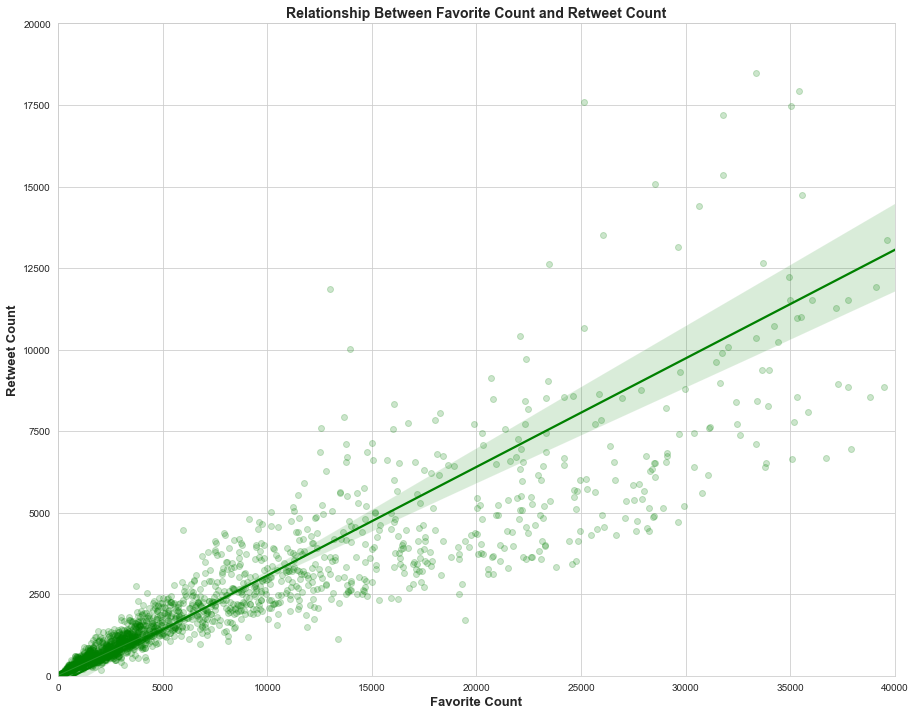

In [113]:
# Generating visualization to determine correlation between retweets and favorite counts
ax = sns.regplot(y = 'retweet_count', x = 'favorite_count',
                 data = df_master_cleaned, scatter_kws = {'alpha':1/5},
                 color='green')

# Zooming into largest plot point cluster
ax.set(xlim=(0,40000),ylim=(0,20000))


plt.xlabel("Favorite Count", fontsize=13, fontweight='bold')
plt.ylabel("Retweet Count", fontsize = 13, fontweight='bold')
plt.title("Relationship Between Favorite Count and Retweet Count", fontsize=14, fontweight='bold')

# Saving figure to local output
fig = plt.gcf()
fig.savefig('retweet_favorite.png', bbox_inches='tight');

In [114]:
# Getting correlation coefficients
df_master_cleaned[['retweet_count', 'favorite_count']].corr(method='pearson').round(3)

,retweet_count,favorite_count
retweet_count,1.000,0.906
favorite_count,0.906,1.000


From the plot and the correlation matrix above, we can clearly observe a strong positive correlation between favorite counts and retweet counts. With a Pearson Coefficient / **r** value of 0.906, it can safely be assumed that there is a high probability of tweets with high retweet counts also having high favorite counts. While a majority of the tweets have below 5000 retweets and 2500 favorites, there also exists a significant number of tweets with counts way above these values.

### Insight - 3: Identifying the Most Popular Breeds

For this analysis, we will look at the most popular breeds of dogs by considering 35 positive predictions or above. We know that there are over 400 tweets with unclassified breeds in the data set, so we will proceed to filter out these values to get to our desired results.

In [116]:
# Filtering for breeds with 35 or above positive predictions
dog_filter = df_master_cleaned.groupby('breed').filter(lambda x:len(x) >= 35)
dogs_verified = dog_filter['breed'] != 'Not Dog'

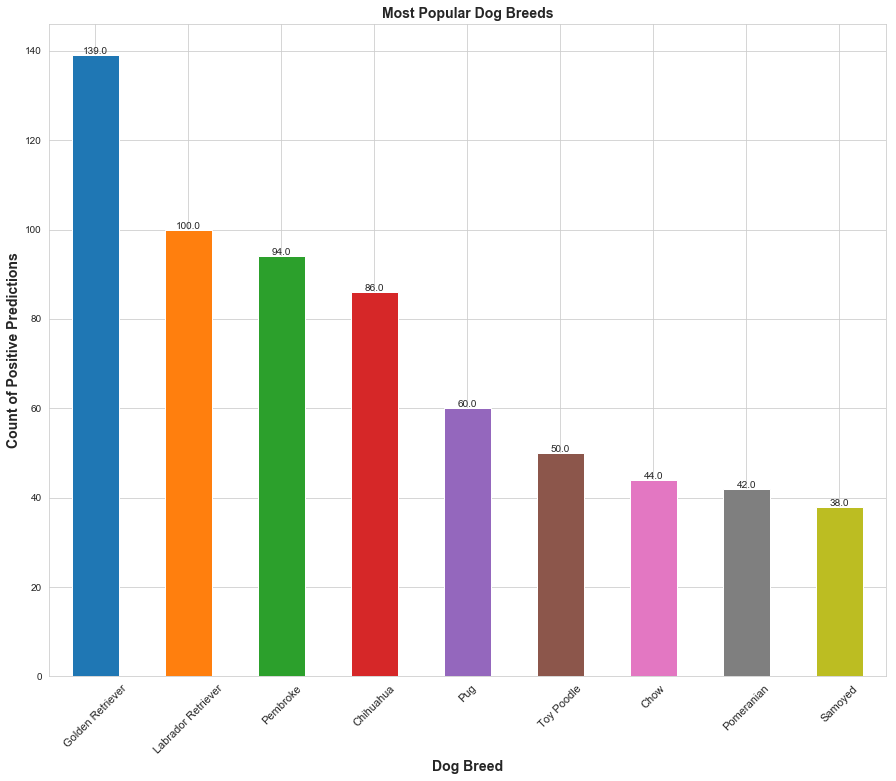

In [118]:
# Setting up figure
sns.set_color_codes('deep')
barwidth=0.25

# Plotting
ax = dog_filter[dogs_verified].breed.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count of Positive Predictions', fontweight='bold', fontsize=14)
plt.xlabel('Dog Breed', fontweight='bold', fontsize=14)
plt.title('Most Popular Dog Breeds', fontweight='bold', fontsize=14)

rects = ax.patches

# For each bar, place a label
for rect in rects:
    # Get X and Y placement of label from rect
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    # Number of points between bar and label
    space = 8
    # Use Y value as label and format number with one decimal place
    label = "{:.1f}".format(y_value)
    # Create annotation
    plt.annotate(label,
                (x_value, y_value),
                 xytext=(0, space),
                 textcoords="offset points",
                 ha='center',
                 va='top')

# Rotating X tick labels    
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_fontsize(11)

# Saving figure to local output
fig = plt.gcf()
fig.savefig('popular_breeds.png', bbox_inches='tight');

The plot above shows that the most popular breed, by a wide margin, is the Golden Retriever with 139 positive predictions. Second and third place go to the Labrador Retriever and the Pembrooke with 100 and 94 predicions respectively. Chihuahua's, Pugs and Toy Poodles make up fourth, fifth and sixth places with 86, 60 and 50 predictions. Finally, Chows, Pomeranians and Samoyeds take seventh, eighth and ninth place with 44, 42 and 38 predictions. 

However, these results come with a caveat; that being the results of these predictions are only as good as the CNN's algorithm. So, these results reflect the outcomes of the current CNN and may change with a code revision for improved outcomes. 

Going forward, let's also take a look at whether the results of the plot are aso reflected in retweet counts and favorite counts for the different breeds of dogs.

In [119]:
# Creating a copy dataframe to calculate the sum of retweet counts
df_filtered = df_master_cleaned[['breed', 'retweet_count', 
                                 'favorite_count']].groupby('breed').sum().sort_values('retweet_count', ascending=False)

In [120]:
# Top 10 breeds by retweet and favorite count
df_filtered.head(10)

,retweet_count,favorite_count
breed,,
Not Dog,691478,2002314
Golden Retriever,460827,1602374
Labrador Retriever,341361,1092075
Pembroke,273271,969613
Samoyed,158426,472290
Chihuahua,153241,543649
French Bulldog,143712,515823
Chow,116202,406003
Toy Poodle,112798,331377


If we take a closer look at the sum of retweets and favourite counts for the most popular breeds, it becomes apparent that the Golden Retriever and the Labrador Retriever take the top two spots with 460,827 and 341,361 total retweets. Additionally, these two breeds have 1,602,374 and 1,092,075 likes respectively. We can even jump to the bottom of the table to view the breeds with the fewest retweets and favorites.

In [121]:
df_filtered.tail(3)

,retweet_count,favorite_count
breed,,
Entlebucher,706,2678
Groenendael,553,2313
Japanese Spaniel,471,1362


And thus, the breeds with the lowest scores for retweet and favorite counts are the Japanese Spaniel, Groenendael and Entlebucher with 471, 553 and 706 retweets respectively.

## References:

1. [Stack Overflow: Maximum allowable columns for the entire script](https://stackoverflow.com/questions/27163830/ipython-notebook-pandas-max-allowable-columns)

2. [Stack Abuse:Using Regex for Text Manipulation in Python ](https://stackabuse.com/using-regex-for-text-manipulation-in-python/)

3. [Stack Overflow:Pandas 'drop_duplicates()' Documentation](http://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.DataFrame.drop_duplicates.html)

4. [Stack Overflow: Rearranging Pandas Columns](https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns)

5. [Stack Overflow: Deleting Rows Based on Conditional Expressions](https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression)

6. [Dataquest Data Science Blog: Working with SQLite Databases using Python and Pandas](https://www.dataquest.io/blog/python-pandas-databases/)

7. [Seaborn Documentation: regplot()](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot)

8. [Stack Overflow: Setting Default Figure Size in matplotlib ](https://stackoverflow.com/questions/17230797/how-to-set-the-matplotlib-figure-default-size-in-ipython-notebook)

9. [Stack Overflow: Adding Value Labels on matplotlib Bar Chart](https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart)

10. [Tidy Data in Python - by Jean-Nicholas Hould](http://www.jeannicholashould.com/tidy-data-in-python.html)
